## Prediction using supervised Machine Learning (Level Beginner)
In this regression work, I will try to forecast a student's expected percentage of marks depending on the amount of hours they studied. Because there are only two variables, this is a straightforward linear regression problem.

** task info **
1. Predict a student's percentage based on the number of study hours.
2. Because there are just two variables, this is a straightforward Linear Regression problem.
3. R, Python, SAS Enterprise Miner, or any other tool are all options.
4. If a student studies for 9.25 hours per day, I will try to predict a score.

In [1]:
# All libraries required for this notebook are being imported.
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# Step-01: Data gathering

In [2]:
# Reading data from remote link
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
print('imported data successfully')
data

imported data successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
data.shape # Checking number of rows and columns

(25, 2)

In [5]:
data.info() # getting information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Step-2: Data Cleaning

In [6]:
data.isnull().sum() # Checking null values

Hours     0
Scores    0
dtype: int64

There are no missing values

In [7]:
data.drop_duplicates(inplace=True) # drop duplicate values, if available
data.shape

There is no duplicates value becaues number of row remain same

# Step-3: Statistical Analysis

In [8]:
data.describe().T # getting important statistical information

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# Step-4: Exploratory Data Analysis (EDA)

Let's eyeball our dataset by plotting our data points on a 2-D graph and seeing if we can spot any relationships between the data manually. Using the following script, we can make the plot:

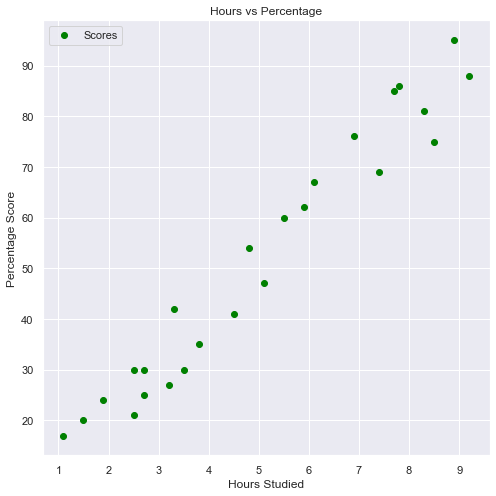

In [15]:
# Plotting the distribution of scores
plt.figure(figsize=(8,8))
sns.set(style='dark')
plt.scatter(x=data['Hours'], y=data['Scores'],label='Scores',color='green')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.title('Hours vs Percentage')  
plt.legend()
plt.grid()
plt.show()

The graph above clearly shows that the number of hours studied and the percentage of score have a positive linear relationship.

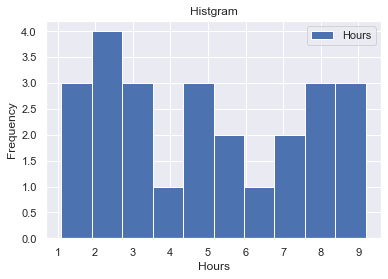

In [44]:
data['Hours'].plot(kind='hist') # Checking the distribution of Study Hours over x axis 
plt.xlabel('Hours')
plt.title('Histgram')  
plt.grid()
plt.legend()
plt.show()

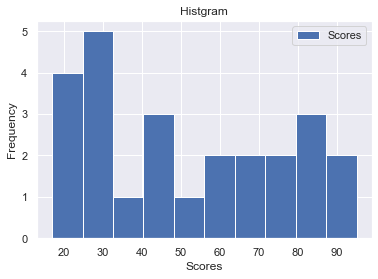

In [42]:
data['Scores'].plot(kind='hist') # Checking the distribution of Scores over x axis 
plt.xlabel('Scores')
plt.title('Histgram')  
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'boxenplot')

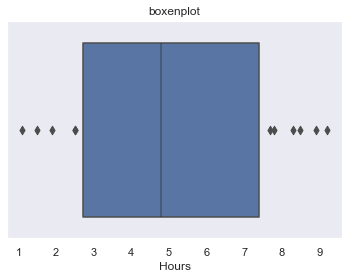

In [47]:
sns.boxenplot(data=data, x='Hours' ) # Checking unexpected values
plt.title('boxenplot')

Text(0.5, 1.0, 'boxenplot')

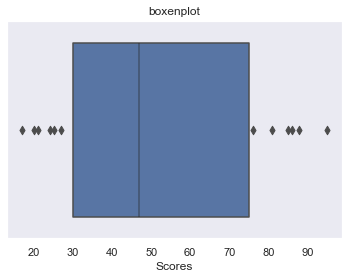

In [48]:
sns.boxenplot(data=data, x='Scores' ) # Checking unexpected values
plt.title('boxenplot')

# Step-5: Data Preprocessing
The data is then divided into "attributes" (inputs) and "labels" (outputs) (outputs)

In [ ]:
feature=data[['Hours']] # Feature values 
feature

In [ ]:
target=data[['Scores']] # target value
target

# Step-6: Train & Test split
The next step is to divide the data into training and test sets now that we have our attributes and labels. We'll use the built-in train_test_split() function in Scikit-Learn to achieve this:

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test=train_test_split(feature,target,test_size=0.2,random_state=2)

In [62]:
X_train.shape

(20, 1)

In [63]:
X_test.shape

(5, 1)

# step-7: Training model
Now that I've separated our data into training and testing sets, it's time to train our algorithm.

In [65]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [67]:
regressor.fit(X_train,Y_train)
print("Training complete.")

Training complete.


# Step-9: Plotting the regression line